In [1]:
train_df<-read.csv("../Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [4]:
# Cabin에 "" 안에 데이터가 없어서 수정해줘야한다. -> 2,3등급은 객실자체가 없어서 데이터가 없다 그래서 수정필요없다.
# Embarked "" 안에 데이터가 없어서 수정해줘야한다.- 이상치

### 컬럼 내용 확인
- Survivied : 생존 여부, 0=사망, 1=생존
- Pclass : 티켓 등급, 1=1등급, 2=2등급, 3=3등급
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임
- Cabin : 객실 번호
- Embarked : 탑승항구, C=Chersbourg, Q=Queenstown, S=Southampton

In [5]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))
colSums(is.na(train_df)) # 컬럼 별로 sum하기

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [6]:
177/891
# 30%이상이면 결측치로 못쓴다.
# 중요한 컬럼이다.

[1] 0.1986532

In [7]:
# train_df$Age가 NA인 것 빼고 데이터셋 만들기

head(subset(train_df, !is.na(train_df$Age)))
nrow(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [8]:
# Survived 기준으로 Dataset 정렬
library(dplyr)
train_df<-(arrange(train_df,Survived))
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [9]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [10]:
# 정렬된 크기 확인하기
dim(train_df)

[1] 891  12

# Target Column : Survived 분석 및 확인

In [11]:
table(train_df$Survived)


  0   1 
549 342 

In [12]:
# Survived의 생존과 사망 Count 확인 및 비율 계산하기

# 사망지수
nrow(subset(train_df,Survived ==0))
# 생존지수
nrow(subset(train_df,Survived ==1))
# 생존자수의 비율
nrow(subset(train_df,Survived ==1))/nrow(train_df)
# 사망자수의 비율
nrow(subset(train_df,Survived ==0))/nrow(train_df)

[1] 549

[1] 342

[1] 0.3838384

[1] 0.6161616

In [13]:
library(plotrix)

In [14]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [15]:
deathCount<-sum(train_df$Survived ==0);
liveCount<-sum(train_df$Survived ==1);

In [16]:
SurvivedVector <-c(deathCount,liveCount)
SurvivedVector


[1] 549 342

In [17]:
ratio <- round(SurvivedVector/sum(SurvivedVector)*100,2);ratio
label <- paste(c("사망","생존"),"\n", ratio,"%"); label



[1] 61.62 38.38

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

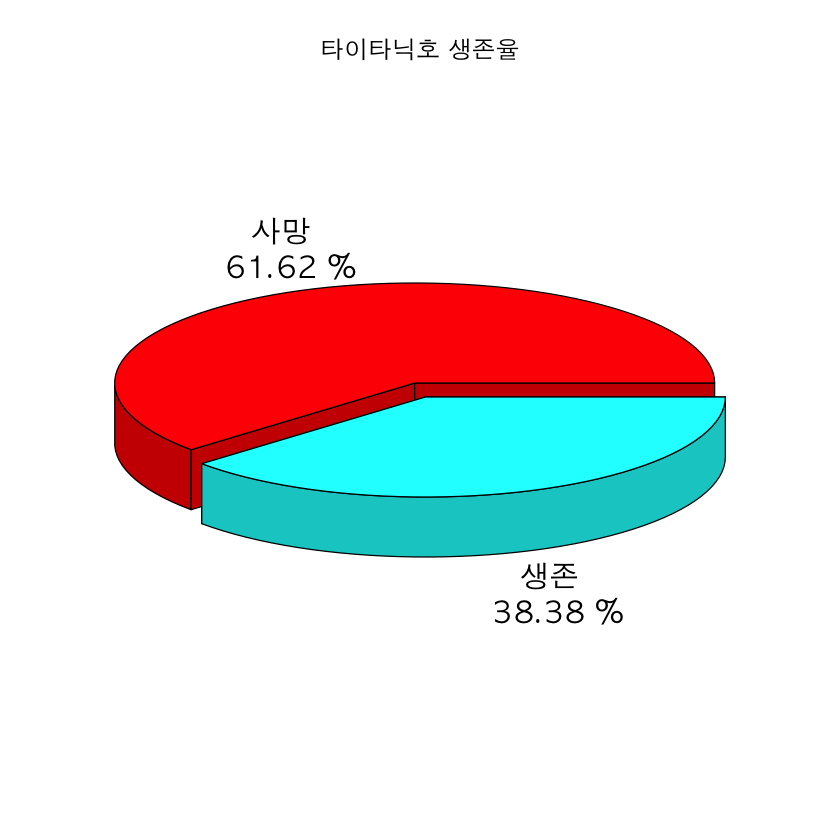

In [18]:
options(warn = -1)
par(family = 'AppleGothic') 


pie3D(SurvivedVector,
   labels = label,
   main = "타이타닉호 생존율",
  explode = 0.05,
)

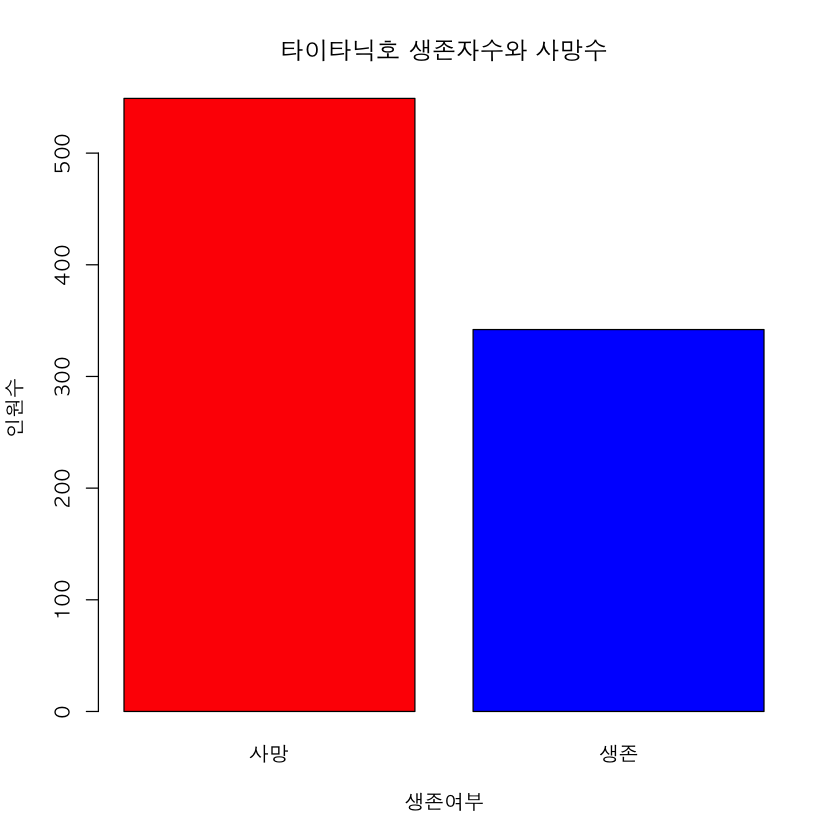

In [19]:
par(family = 'AppleGothic') 
barplot(table(train_df$Survived),
       main = '타이타닉호 생존자수와 사망수',
       col =c('red','blue'),
        xlab = '생존여부',
        ylab ='인원수',
        names = c('사망','생존')
    
        )

> Target Column으로 Survived를 선정

# Feature column 찾기

In [20]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


# Sex컬럼 확인

In [21]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [22]:
# 여성과 남성의 인원 확인
femaleCount <- sum(train_df$Sex=="female");femaleCount
maleCount <- sum(train_df$Sex=="male");maleCount

[1] 314

[1] 577

In [23]:
# 여성의 생존수와 사망수
femaleSurvive<-nrow(subset(train_df,(Sex =="female")&(Survived ==1)));femaleSurvive
femaleDeath<-nrow(subset(train_df,(Sex =="female")&(Survived ==0)));femaleDeath

[1] 233

[1] 81

In [24]:
# 남성의 생존수와 사망수
maleSurvive<-nrow(subset(train_df,(Sex =="male")&(Survived ==1)));maleSurvive
maleDeath<-nrow(subset(train_df,(Sex =="male")&(Survived ==0)));maleDeath

[1] 109

[1] 468

In [25]:
# 여성의 생존율과 사망율
femaleVector<-c(femaleSurvive,femaleDeath)
ratioF <- round(femaleVector/sum(femaleVector)*100,2);ratioF

cat("여성의 생존율 :", round(femaleSurvive/femaleCount*100,2),"%","\n")
cat("여성의 사망율 :", round(femaleDeath/femaleCount*100,2),"%","\n")

[1] 74.2 25.8

여성의 생존율 : 74.2 % 
여성의 사망율 : 25.8 % 


In [26]:
# 남성의 생존율과 사망율
maleVector<-c(maleSurvive,maleDeath)
ratioM <- round(maleVector/sum(maleVector)*100,2);ratioM

cat("남성의 생존율 :", round(maleSurvive/maleCount*100,2),"%","\n")
cat("남성의 사망율 :", round(maleDeath/maleCount*100,2),"%","\n")

[1] 18.89 81.11

남성의 생존율 : 18.89 % 
남성의 사망율 : 81.11 % 


> Sex 컬럼은 Feature로 적합 <br>
> [Survived]<-[Sex]

In [27]:
# 타이타닉의 여성의 생존율과 사망율
label <- paste(c("사망","생존"),"\n", ratioF,"%"); label

[1] "사망 \n 74.2 %" "생존 \n 25.8 %"

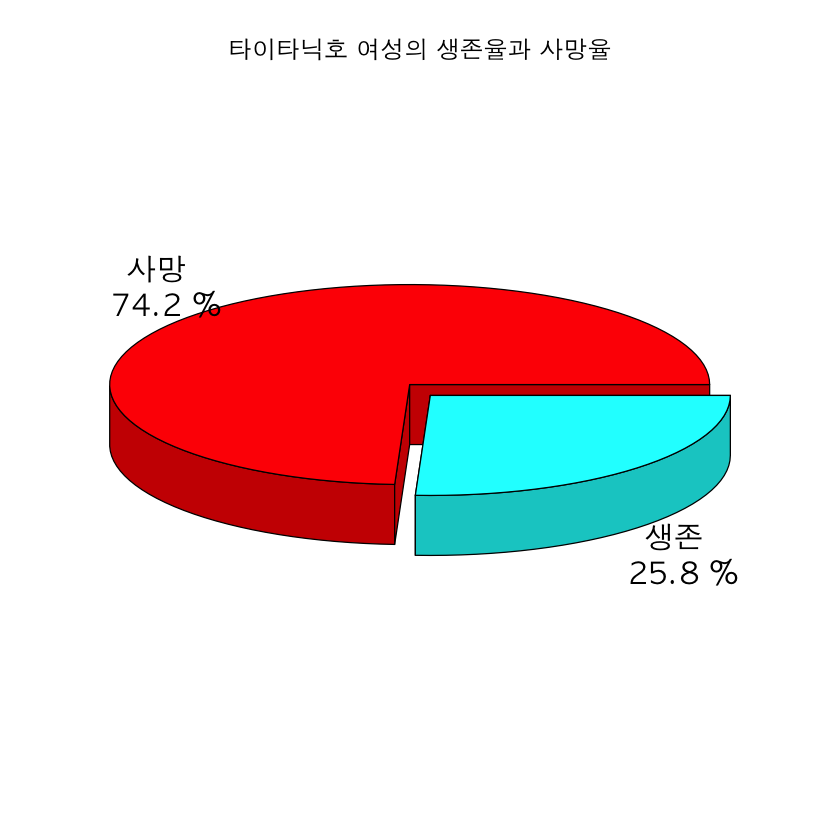

In [28]:
options(warn = -1)
par(family = 'AppleGothic') 


pie3D(femaleVector,
   labels = label,
   main = "타이타닉호 여성의 생존율과 사망율",
  explode = 0.05,
)

In [29]:
# 타이타닉의 남성의 생존율과 사망율
label <- paste(c("사망","생존"),"\n", ratioM,"%"); label

[1] "사망 \n 18.89 %" "생존 \n 81.11 %"

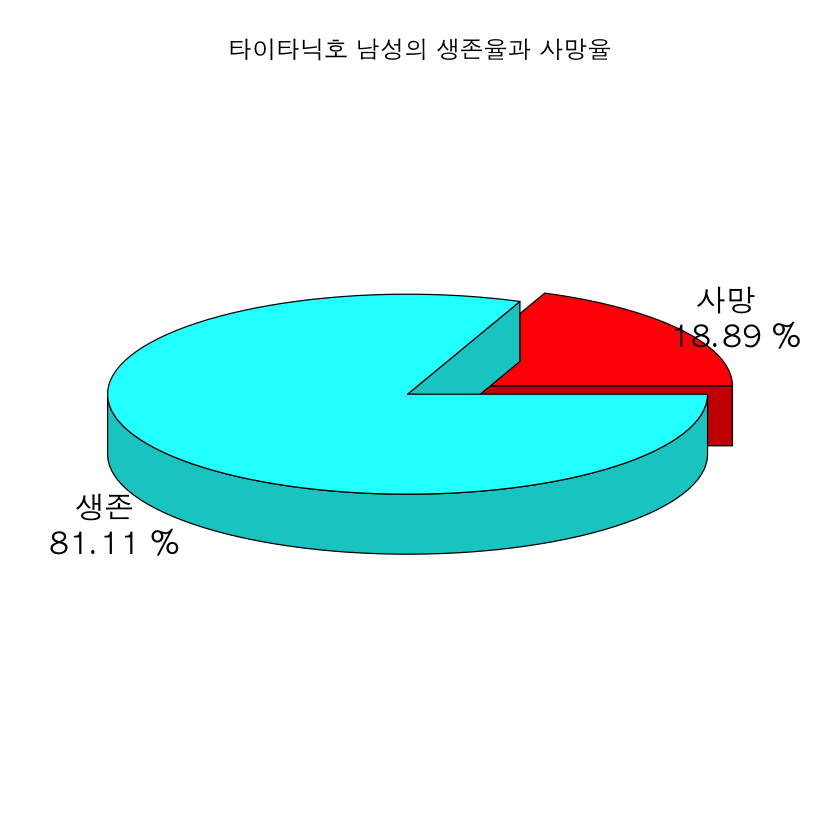

In [30]:
options(warn = -1)
par(family = 'AppleGothic') 


pie3D(maleVector,
   labels = label,
   main = "타이타닉호 남성의 생존율과 사망율",
  explode = 0.05,
)

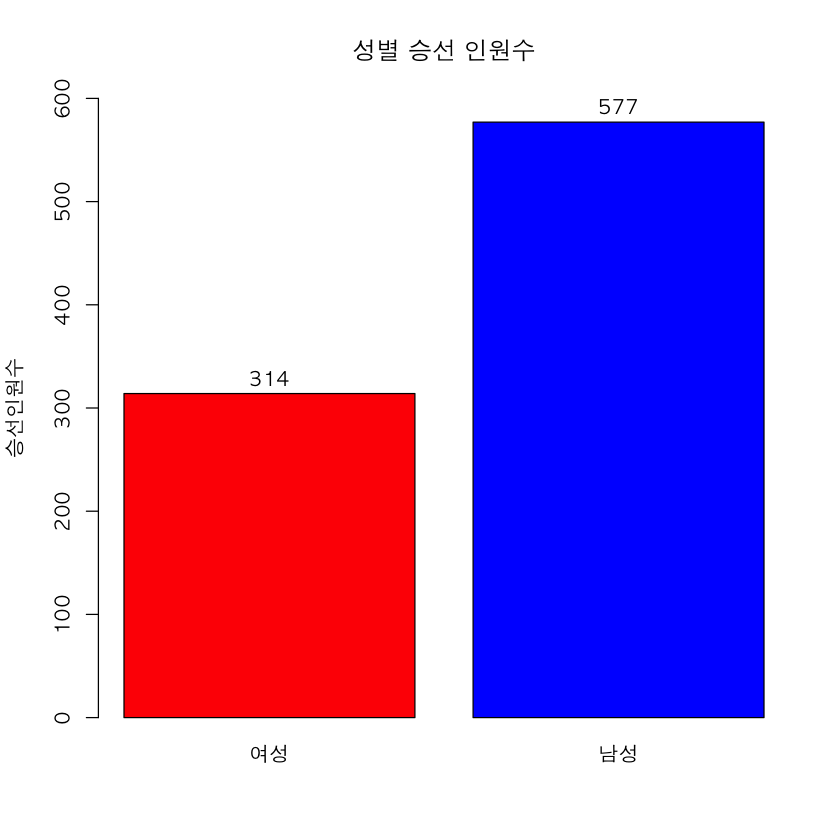

In [31]:
# 성별 승선 인원수
par(family = 'AppleGothic') 
x <- c(femaleCount,maleCount)
barplot(x, 
        main ="성별 승선 인원수",
        ylim = c(0,600),
        ylab = "승선인원수",
        names = c("여성","남성"),
        col = c("red","blue")
        )
for(i in 1:2){
  text(1.2*i-0.5,x[i] +15 ,x[i] ) 
}

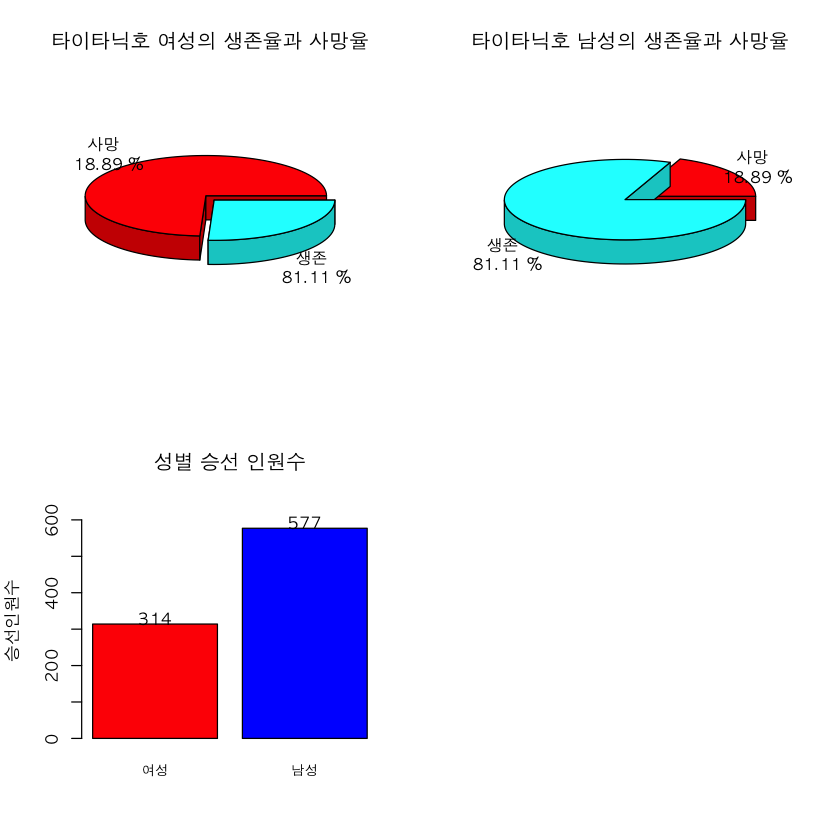

In [32]:
par(mfrow=c(2,2))

options(warn = -1)
par(family = 'AppleGothic') 


pie3D(femaleVector,
   labels = label,
   main = "타이타닉호 여성의 생존율과 사망율",
  explode = 0.05,
     labelcex=0.8 
)
pie3D(maleVector,
   labels = label,
   main = "타이타닉호 남성의 생존율과 사망율",
  explode = 0.05,
      labelcex=0.8 
)
x <- c(femaleCount,maleCount)
barplot(x, 
        main ="성별 승선 인원수",
        ylim = c(0,650),
        ylab = "승선인원수",
        names = c("여성","남성"),
        col = c("red","blue"),
        cex.names = 0.8
        )
for(i in 1:2){
  text(1.2*i-0.5,x[i] +15 ,x[i] ) 
}


---
# 티켓 등급 분석

In [33]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [34]:
# 1~3등 객실의 여성 생존율
# 1~3등 객실의 남성 생존율

# femalePclass<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==1))); femalePclass
# femalePclass<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==2))); femalePclass
# femalePclass<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==3))); femalePclass

# femalePclass1<-nrow(subset(train_df,(Sex=="female")&(Pclass ==1)));femalePclass1
# femalePclass1<-nrow(subset(train_df,(Sex=="female")&(Pclass ==2)));femalePclass1
# femalePclass1<-nrow(subset(train_df,(Sex=="female")&(Pclass ==3)));femalePclass1

# nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==1)))/nrow(subset(train_df,(Sex=="female")&(Pclass ==1)))*100


for(i in 1:3){
    cat(i,"등 객실의 여성 생존율은",nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==i))),"/"
        ,nrow(subset(train_df,(Sex=="female")&(Pclass ==i))),","
        ,round(nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==i)))/nrow(subset(train_df,(Sex=="female")&(Pclass ==i)))*100,2),"%","\n")    
}
cat("----------------------------------------\n")
for(i in 1:3){
    cat(i,"등 객실의 남성 생존율은",nrow(subset(train_df,(Sex=="male")&(Survived ==1)&(Pclass ==i))),"/"
        ,nrow(subset(train_df,(Sex=="male")&(Pclass ==i))),","
        ,round(nrow(subset(train_df,(Sex=="male")&(Survived ==1)&(Pclass ==i)))/nrow(subset(train_df,(Sex=="male")&(Pclass ==i)))*100,2),"%","\n")
}



1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
----------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 


In [35]:
# 객실 등급별 생존율

In [36]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [37]:
a<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==1)))/nrow(subset(train_df,(Sex=="female")&(Pclass ==1)))*100
b<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==2)))/nrow(subset(train_df,(Sex=="female")&(Pclass ==2)))*100
c<-nrow(subset(train_df,(Sex=="female")&(Survived ==1)&(Pclass ==3)))/nrow(subset(train_df,(Sex=="female")&(Pclass ==3)))*100
d<-nrow(subset(train_df,(Sex=="male")&(Survived ==1)&(Pclass ==1)))/nrow(subset(train_df,(Sex=="male")&(Pclass ==1)))*100
e<-nrow(subset(train_df,(Sex=="male")&(Survived ==1)&(Pclass ==2)))/nrow(subset(train_df,(Sex=="male")&(Pclass ==2)))*100
f<-nrow(subset(train_df,(Sex=="male")&(Survived ==1)&(Pclass ==3)))/nrow(subset(train_df,(Sex=="male")&(Pclass ==3)))*100

In [38]:
Z<-round(c(a,b,c,d,e,f),2)

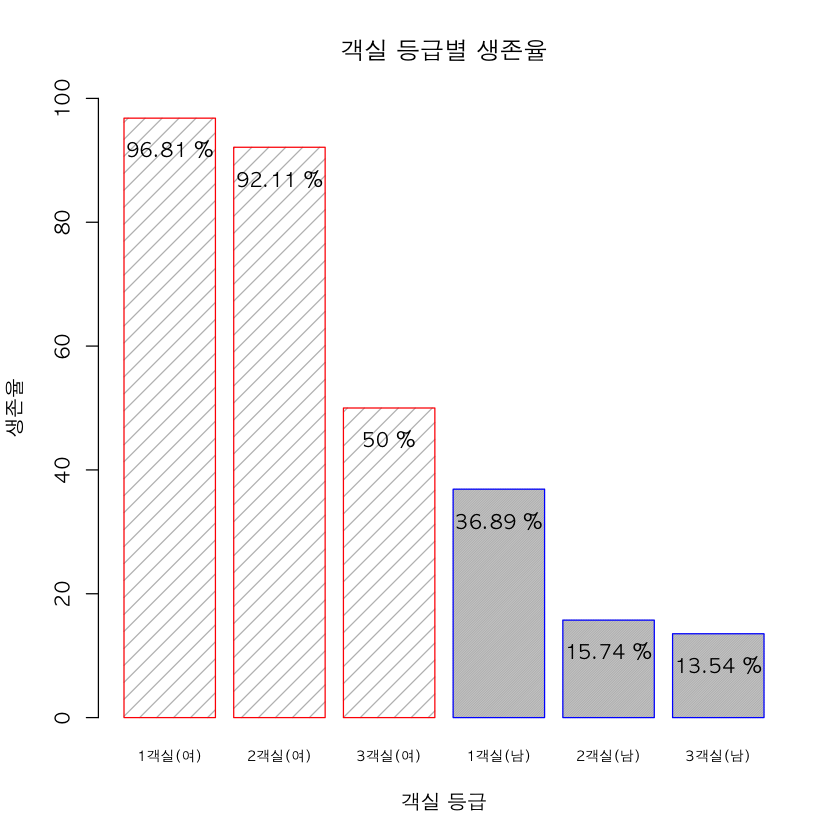

In [39]:
par(family='AppleGothic')
barplot(Z,
       main = "객실 등급별 생존율",
       xlab = "객실 등급",
       ylim=c(0,100), 
       ylab = "생존율",
       names = c("1객실(여)","2객실(여)","3객실(여)","1객실(남)","2객실(남)","3객실(남)"),
       border = c(rep('red',3), rep('blue',3)), #겉선
       density = c(10,10,10,100,100,100),
     cex.names = 0.7
       )

for(i in 1:6){
  text(1.2*i-0.5,Z[i] -5 ,paste(Z[i],"%"))
}

> [Survived] <- [Sex,Pclass]

In [40]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked(항구위치)

In [41]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [42]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [43]:
unique(train_df$Embarked)

[1] S Q C  
Levels:  C Q S

In [44]:
# 빈칸의 데이터 찾기
subset(train_df,Embarked =="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [45]:
# 제일 많은 운임을 지불한 사람
subset(train_df,Fare ==max(train_df$Fare))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [46]:
mean(train_df$Fare)

[1] 32.20421

In [47]:
# Embarked의 빈 데이터에 대한 값을 수정하기
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# S항구 탑승인원
nrow(subset(train_df,Embarked == "S"))
# C항구 탑승인원
nrow(subset(train_df,Embarked == "C"))
# Q항구 탑승인원
nrow(subset(train_df,Embarked == "Q"))

[1] 644

[1] 168

[1] 77

> 빈값 항구를 S항구로 변경

In [48]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [49]:
# 빈칸 항구 찾기 -1
subset(train_df_T, Embarked =="")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [50]:
# 빈칸 항구 찾기 -2
train_df_T[train_df_T$Embarked =="",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [51]:
# 빈칸 항구를 S항구로 변경 -1
train_df_T$Embarked<- ifelse(train_df_T$Embarked =="","S",train_df_T$Embarked) 

In [52]:
train_df_T[train_df_T$Embarked =="",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
# 빈칸 항구를 S항구로 변경 -2
train_df_T <- train_df

In [54]:
train_df_T[train_df_T$Embarked =="",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [55]:
train_df_T[train_df_T$Embarked =="",]$Embarked <-"S"

In [56]:
# 빈칸 항구를 S항구로 변경 -3
train_df_T <- train_df

In [57]:
train_df_T$Embarked[train_df_T$Embarked ==""] <- "S"

---

In [58]:
train_df$Embarked[train_df$Embarked ==""] <- "S"

In [59]:
nrow(subset(train_df,Embarked == "S"))

[1] 646

In [60]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [61]:
train_df$Embarked<-factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


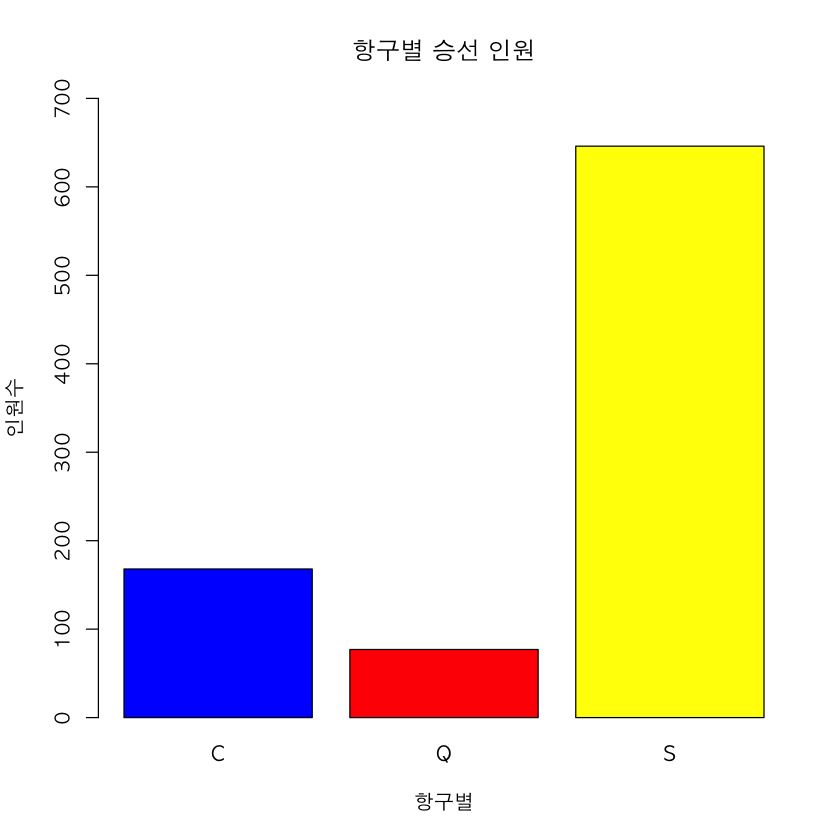

In [62]:
# 항구별 승선 인원
par(family = 'AppleGothic') 
x<-c(nrow(subset(train_df,Embarked == "C")),
    nrow(subset(train_df,Embarked == "Q")),
    nrow(subset(train_df,Embarked == "S")))



barplot(x, 
        main ="항구별 승선 인원",
        ylim = c(0,700),
        ylab = "인원수",
        xlab = "항구별",
        names = c("C","Q","S"),
        col = c("blue","red","yellow")
        )


In [64]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [65]:
t(table(train_df[c("Embarked","Pclass")]))

      Embarked
Pclass   C   Q   S
     1  85   2 129
     2  17   3 164
     3  66  72 353

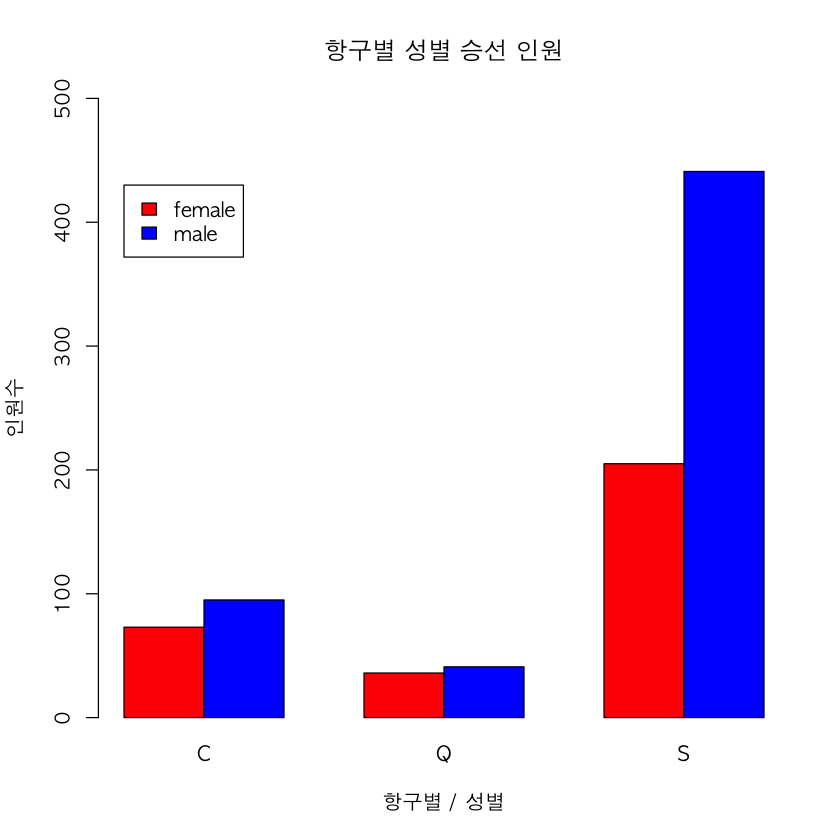

In [66]:
# 항구별 성별 승선 인원

options(warn = -1)
par(family = 'AppleGothic') 

barplot(t(table(train_df[c("Embarked","Sex")])),
          main ="항구별 성별 승선 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별 / 성별",
         col = c("red","blue"),
     ) 

 legend(1,430,  
        c('female','male'), 
        fill = c('red','blue'),
        )


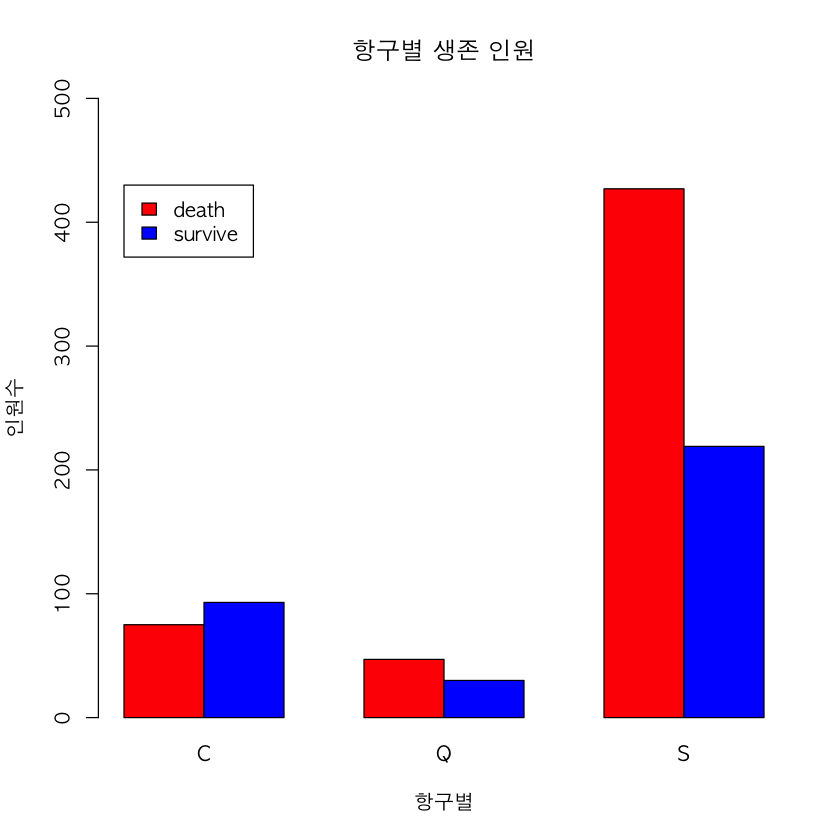

In [67]:
# 항구별 승선 인원

options(warn = -1)
par(family = 'AppleGothic') 

barplot(t(table(train_df[c("Embarked","Survived")])),
          main ="항구별 생존 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별",
         col = c("red","blue"),
     ) 

 legend(1,430,  
        c('death','survive'), 
        fill = c('red','blue'),
        )

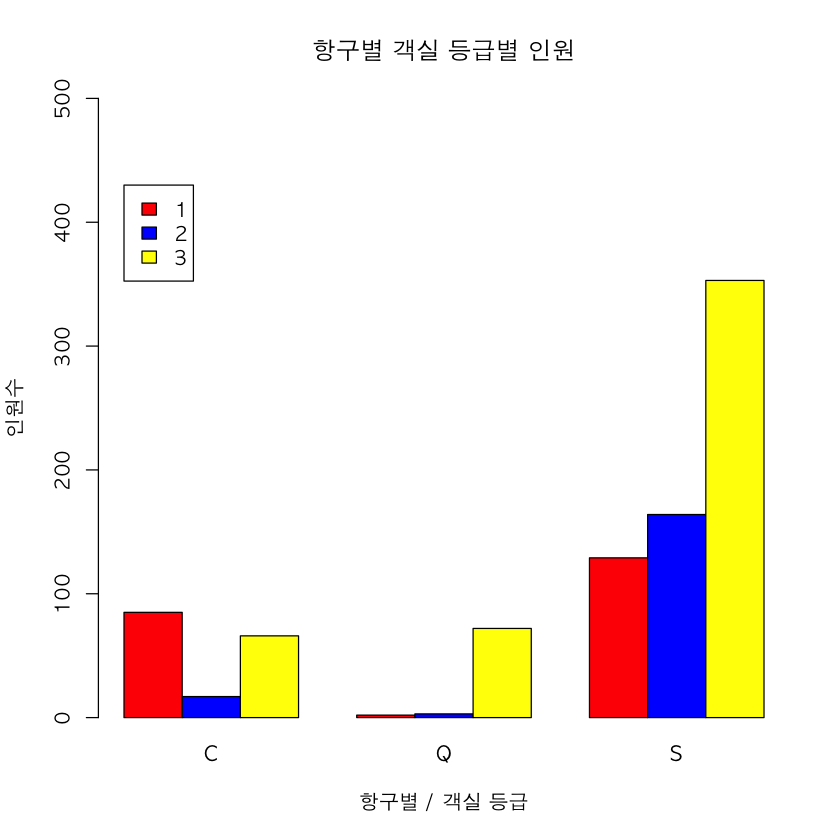

In [68]:
# 항구별 생존 인원
options(warn = -1)
par(family = 'AppleGothic') 

barplot(t(table(train_df[c("Embarked","Pclass")])),
          main ="항구별 객실 등급별 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별 / 객실 등급",
         col = c("red","blue","yellow"),
     ) 

 legend(1,430,  
        c('1','2','3'), 
        fill = c('red','blue',"yellow"),
        )

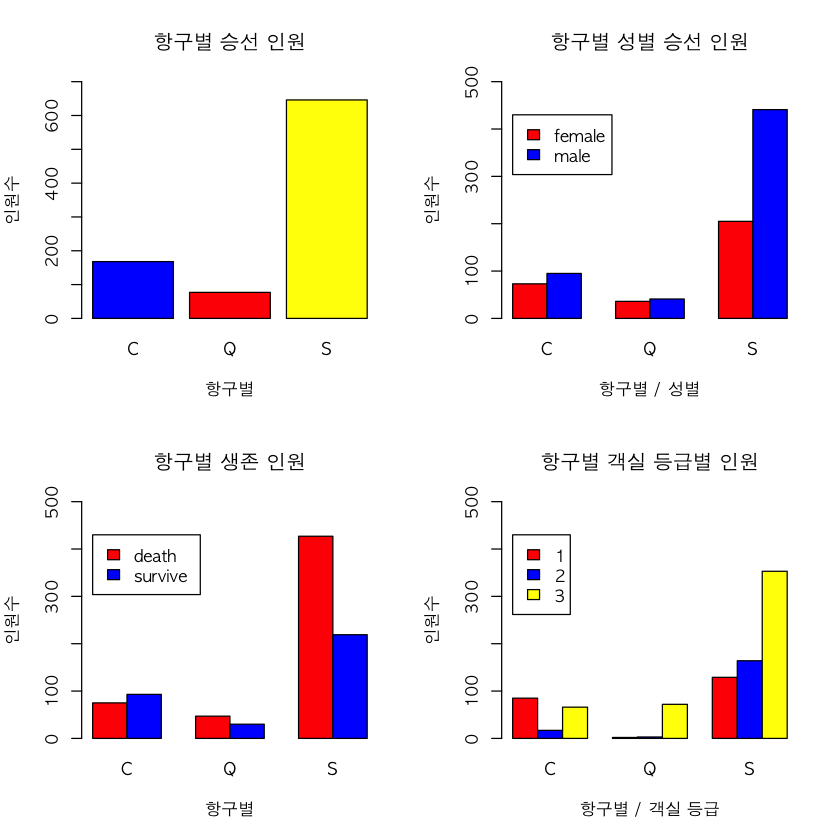

In [69]:
# 그래프 한눈에 보기
par(mfrow=c(2,2))

par(family = 'AppleGothic') 
x<-c(nrow(subset(train_df,Embarked == "C")),
    nrow(subset(train_df,Embarked == "Q")),
    nrow(subset(train_df,Embarked == "S")))



barplot(x, 
        main ="항구별 승선 인원",
        ylim = c(0,700),
        ylab = "인원수",
        xlab = "항구별",
        names = c("C","Q","S"),
        col = c("blue","red","yellow")
        )
barplot(t(table(train_df[c("Embarked","Sex")])),
          main ="항구별 성별 승선 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별 / 성별",
         col = c("red","blue"),
     ) 

 legend(1,430,  
        c('female','male'), 
        fill = c('red','blue'),
        )
barplot(t(table(train_df[c("Embarked","Survived")])),
          main ="항구별 생존 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별",
         col = c("red","blue"),
     ) 

 legend(1,430,  
        c('death','survive'), 
        fill = c('red','blue'),
        )
barplot(t(table(train_df[c("Embarked","Pclass")])),
          main ="항구별 객실 등급별 인원",
          beside = T,
         ylim = c(0,500),
         ylab = "인원수",
         xlab = "항구별 / 객실 등급",
         col = c("red","blue","yellow"),
     ) 

 legend(1,430,  
        c('1','2','3'), 
        fill = c('red','blue',"yellow"),
        )


---
# RandomForest로 예측모델 생성

In [70]:
# 복사본
train_df_T <- train_df

In [71]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [72]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [73]:
head(train_df_T)
tail(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [74]:
# 성별 컬럼 삭제
train_df_T<-subset(train_df_T, select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [75]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


# Embarked를 숫자로 전환
C = 0, S = 1, Q = 2 -> 맞긴 맞지만 좋은 생각이 아니다.

2 * S = Q ?

S + S = Q ?

### One-Hot Encoding방법
C == [1,0,0]

S == [0,1,0]

Q == [0,0,1]

처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.

R은 내부적으로 1은 True, 0은 False.

In [76]:
train_df_T$Embarked_C = train_df_T$Embarked =="C"
train_df_T$Embarked_S = train_df_T$Embarked =="S"
train_df_T$Embarked_Q = train_df_T$Embarked =="Q"

head(train_df_T[c('Embarked','Embarked_C','Embarked_S','Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [77]:
target_col = c("Survived","SexCode","Pclass",'Embarked_C','Embarked_S','Embarked_Q')
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,FALSE,TRUE
0,0,1,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE


In [78]:
train_data <- train_df_T[,target_col]

In [79]:
head(train_data)

Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,FALSE,TRUE
0,0,1,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE
0,0,3,FALSE,TRUE,FALSE


In [80]:
sum(train_data$Survived==0)
sum(train_data$Survived==1)

[1] 549

[1] 342

In [81]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [82]:
summary(train_data)

    Survived         SexCode           Pclass      Embarked_C     
 Min.   :0.0000   Min.   :0.0000   Min.   :1.000   Mode :logical  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:2.000   FALSE:723      
 Median :0.0000   Median :0.0000   Median :3.000   TRUE :168      
 Mean   :0.3838   Mean   :0.3524   Mean   :2.309                  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:3.000                  
 Max.   :1.0000   Max.   :1.0000   Max.   :3.000                  
 Embarked_S      Embarked_Q     
 Mode :logical   Mode :logical  
 FALSE:245       FALSE:814      
 TRUE :646       TRUE :77       
                                
                                
                                

In [83]:
# Sampling
library(caret)
set.seed(1234)
samp<- createDataPartition(train_data$Survived, p=0.7, list=F)

samp

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Resample1
1
2
3
4
10
11
12
13
14
15


In [84]:
# 학습용
data.train <- train_data[samp,]

In [85]:
# 검증용
data.test <- train_data[-samp,]
str(data.test)

'data.frame':	267 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SexCode   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 3 3 1 1 3 3 3 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [86]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [87]:
# 학습시키기
rf <- randomForest(Survived~., data=data.train, ntree =100)

In [88]:
# 문제와 정답
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [89]:
# 검증하기
pred <- predict(rf, x)
head(pred)

5         6         7         8         9        16 
0.2294572 0.2294572 0.2294572 0.4137814 0.2730392 0.4387821

In [90]:
pred[pred <= 0.5] <- 0
pred[pred >0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0

In [91]:
mean(pred == y)

[1] 0.7790262

---
# Survived를 Factor로 변환 후 randomForest실행

In [92]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [93]:
rf <- randomForest(Survived ~., data=data.train, ntree=100)

In [94]:
x <- subset(data.test, select=-Survived)
y <- data.test$Survived

In [95]:
pred <- predict(rf,x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [96]:
mean(pred ==y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [97]:
train_df_T <- train_df
head(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [98]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [99]:
Sex,Pclass,Embarked